# 10-K Filings

Welcome. 

With this notebook you will scrape and consolidate training data from the 10-K filings.

<b> IMPORTANT </b> 
<br>
You will have to download [this](https://github.com/dbejarano31/Master-Thesis-Information-Management/blob/main/functions.py) python file from github. This file has all the functions that we have defined so far. Download it and put it in the same directory/folder as this notebook.
<br>
<br>
You will have to specify certain parameters in the following sections:
* 1.1 Querying/parsing recent 10Ks: you have to specify how many days you want to scrape. Note that the higher num_days, the more it will take for the program to work. 

* 1.4 Querying stock price data: you have to specify the time deltas for the analysis. 

In [15]:
%run functions.py
import matplotlib.pyplot as plt
%matplotlib inline

## Querying/parsing recent 10Ks

In [2]:
num_days = 1#CHOOSE HOW MANY DAYS YOU WANT TO SCRAPE
dates = []
codes = []
data = []

In [3]:
forms = get_current_events(num_days, '10-K')
codes = list(forms['CIK Code'])
dates = list(forms['Date Filed'])
cols = ['CIK Code', 'Filings', 'Date Filed']
for link in forms['link_0']:
    if ((len(data)%20)==0):
        print('Read {:,} filings'.format(len(data)))
    data.append(get_10k(link))
df = pd.DataFrame({'CIK Code': codes, 'Filing': data, 'Date Filed': dates})
df

/Users/danielbejarano/functions.py:208: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 208 of the file /Users/danielbejarano/functions.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  params={'q1': days_before, 'q2': 0, 'q3': form_type}).text)
/Users/danielbejarano/functions.py:212: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 212 of the file /Users/danielbej

Read 0 filings


,CIK Code,Filing,Date Filed
0,1549145,Nope,04-06-2021
1,744825,ITEM 1A. RISK FACTORSIn addition to the other ...,04-06-2021
2,1748621,Nope,04-06-2021
3,1160798,ITEM 1A. RISK FACTORS Risks Relating to Our Bu...,04-06-2021
4,928658,Nope,04-06-2021
5,1024095,Nope,04-06-2021
6,867028,Nope,04-06-2021
7,1832511,Nope,04-06-2021
8,1290658,>Item 1A. Risk Factors Risks Related to Our Bu...,04-06-2021
9,845819,ITEM 1A. RISK FACTORS RISK FACTORS As we are ...,04-06-2021


## Cleaning df

In [4]:
df['Date Filed'] = pd.to_datetime(df['Date Filed'], infer_datetime_format = True, errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CIK Code    18 non-null     object        
 1   Filing      18 non-null     object        
 2   Date Filed  18 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 560.0+ bytes


In [5]:
for i in range(len(df)):
    if df['Filing'][i] == 'Nope':
        df['Filing'][i] = np.nan
df.dropna(axis = 0, how = 'any', inplace = True)
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CIK Code,Filing,Date Filed
1,744825,ITEM 1A. RISK FACTORSIn addition to the other ...,2021-04-06
3,1160798,ITEM 1A. RISK FACTORS Risks Relating to Our Bu...,2021-04-06
8,1290658,>Item 1A. Risk Factors Risks Related to Our Bu...,2021-04-06
9,845819,ITEM 1A. RISK FACTORS RISK FACTORS As we are ...,2021-04-06
12,1794717,>Item 1A. Risk Factors 17,2021-04-06


## Querying tickers from SEC

In [6]:
tickers = cach.get(base_url.format('/files/company_tickers.json')).json()
tickers = pd.DataFrame(tickers)
tickers = tickers.transpose()
tickers.columns = ['CIK Code', 'Ticker', 'CompanyName']
df['CIK Code'] = df['CIK Code'].astype(int)
tickers['CIK Code'] = tickers['CIK Code'].astype(int)
tickers.head()

,CIK Code,Ticker,CompanyName
0,320193,AAPL,Apple Inc.
1,789019,MSFT,MICROSOFT CORP
2,1018724,AMZN,AMAZON COM INC
3,1652044,GOOG,Alphabet Inc.
4,1326801,FB,Facebook Inc


In [7]:
## merging the ticker dataframe with the dataframe containing our data
train = df.merge(tickers, on = 'CIK Code', how = 'left')
train['Date Filed'] = train['Date Filed'].dt.strftime('%Y-%m-%d')
train.head()

,CIK Code,Filing,Date Filed,Ticker,CompanyName
0,744825,ITEM 1A. RISK FACTORSIn addition to the other ...,2021-04-06,AMS,AMERICAN SHARED HOSPITAL SERVICES
1,1160798,ITEM 1A. RISK FACTORS Risks Relating to Our Bu...,2021-04-06,OOGI,"C2E ENERGY, INC."
2,1290658,>Item 1A. Risk Factors Risks Related to Our Bu...,2021-04-06,ITOX,"IIOT-OXYS, Inc."
3,845819,ITEM 1A. RISK FACTORS RISK FACTORS As we are ...,2021-04-06,KTEL,"KonaTel, Inc."
4,1794717,>Item 1A. Risk Factors 17,2021-04-06,SCVX,SCVX Corp.


Watch out above, for some reason when querying the tickers we got different tickers for the same company. The ALACU/ALACR/ALACW don't exist in yahoo finance, so we have to remove em. 

## Labelling filing effect

<b> IMPORTANT </b>
<br></br>
The function to assign a label to the effect of the filing requires a time_delta parameter which specifies what is the time window you want to evaluate before/after the filing date. In the example below we use a time_delta of 7. 

In [ ]:
## READ HERE IMPORTANT!!!
#it may happen that the function doesn't work because the Tickers are for some reason floats and not strings, if so,
# this cell

train['Ticker'] = train['Ticker'].astype(str)

In [8]:
price_deltas = get_stats2(train, 7)
price_deltas.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,Ticker,PrevAvgPriceChange,PostAvgPriceChange
0,AMS,0.000094,-0.016917
1,OOGI,0.000000,0.000117
2,ITOX,-0.000005,0.000023
3,KTEL,0.001404,0.005639
4,SCVX,0.000187,0.006579


In [9]:
train_final = train.merge(price_deltas, on = 'Ticker', how = 'left')
train_final.dropna(axis = 0, how = 'any', inplace = True)
train_final = train_final.drop_duplicates('Ticker', keep = 'last')
train_final.reset_index(inplace = True)
train_final.drop(columns = 'index', inplace = True)
train_final.head()

,CIK Code,Filing,Date Filed,Ticker,CompanyName,PrevAvgPriceChange,PostAvgPriceChange
0,744825,ITEM 1A. RISK FACTORSIn addition to the other ...,2021-04-06,AMS,AMERICAN SHARED HOSPITAL SERVICES,0.000094,-0.016917
1,1160798,ITEM 1A. RISK FACTORS Risks Relating to Our Bu...,2021-04-06,OOGI,"C2E ENERGY, INC.",0.000000,0.000117
2,1290658,>Item 1A. Risk Factors Risks Related to Our Bu...,2021-04-06,ITOX,"IIOT-OXYS, Inc.",-0.000005,0.000023
3,845819,ITEM 1A. RISK FACTORS RISK FACTORS As we are ...,2021-04-06,KTEL,"KonaTel, Inc.",0.001404,0.005639
4,1794717,>Item 1A. Risk Factors 17,2021-04-06,SCVX,SCVX Corp.,0.000187,0.006579


In [12]:
prev_labels = []
next_labels = []
final_labels = []

for i in range(len(train_final)):
    if train_final['PrevAvgPriceChange'][i] > 0.01:
        prev_labels.append('up')
    elif train_final['PrevAvgPriceChange'][i] < -0.01:
        prev_labels.append('down')
    else:
        prev_labels.append('stay')
        
    if train_final['PostAvgPriceChange'][i] > 0.01:
        next_labels.append('up')
    elif train_final['PostAvgPriceChange'][i] < -0.01:
        next_labels.append('down')
    else:
        next_labels.append('stay')

In [13]:
for i,j in zip(prev_labels, next_labels):
    if i == j:
        final_labels.append('neutral')
    else:
        if i == 'up':
            final_labels.append('decrease')
        elif i == 'down':
            final_labels.append('increase')
        else:
            if j == 'up':
                final_labels.append('increase')
            elif j == 'down':
                final_labels.append('decrease')

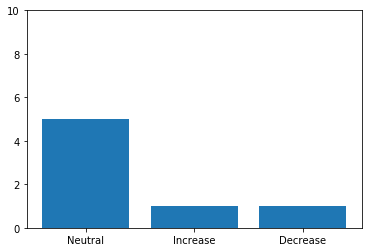

Price increased: 1 times
Price decreased: 1 times
Price did not move: 5 times


In [24]:
incr_counts = 0
decr_counts = 0
neutral_counts = 0

for i in final_labels:
    if i == 'neutral':
        neutral_counts += 1
    elif i == 'increase':
        incr_counts += 1

decr_counts = len(train_final) - (incr_counts + neutral_counts)        

counts = [neutral_counts, incr_counts, decr_counts]
labels = ['Neutral', 'Increase', 'Decrease']

plt.bar(labels, counts)
plt.ylim([0,10]) ##change y-axis scale here
plt.show()

print('Price increased: {} times'.format(incr_counts))
print('Price decreased: {} times'.format(decr_counts))
print('Price did not move: {} times'.format(neutral_counts))

If you want to change the scale of the y-axis see the code above.

In [22]:
train_final.insert(7, 'Label', final_labels)
train_final.head()

,CIK Code,Filing,Date Filed,Ticker,CompanyName,PrevAvgPriceChange,PostAvgPriceChange,Label
0,744825,ITEM 1A. RISK FACTORSIn addition to the other ...,2021-04-06,AMS,AMERICAN SHARED HOSPITAL SERVICES,0.000094,-0.016917,decrease
1,1160798,ITEM 1A. RISK FACTORS Risks Relating to Our Bu...,2021-04-06,OOGI,"C2E ENERGY, INC.",0.000000,0.000117,neutral
2,1290658,>Item 1A. Risk Factors Risks Related to Our Bu...,2021-04-06,ITOX,"IIOT-OXYS, Inc.",-0.000005,0.000023,neutral
3,845819,ITEM 1A. RISK FACTORS RISK FACTORS As we are ...,2021-04-06,KTEL,"KonaTel, Inc.",0.001404,0.005639,neutral
4,1794717,>Item 1A. Risk Factors 17,2021-04-06,SCVX,SCVX Corp.,0.000187,0.006579,neutral


In [ ]:
train_final.to_csv('final-data-10K', encoding = 'utf-8')